# **Building** **Image** **Classifier**

In [4]:
#importing all modules 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [5]:
#classifying image into 10 categories
#using Fshion MNIST database having greyscale image of 10 fashion categories
#images are of 28 x 28 pixel  
fashion_mnist = keras.datasets.fashion_mnist #importing dtaset from keras

In [6]:
#loading data as train and test data sets
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


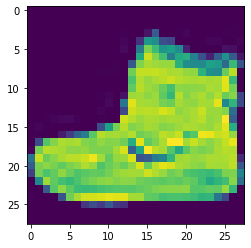

In [7]:
#plotting image of train data set
plt.imshow(X_train_full[0])

In [9]:
# y_train_full correspond to label of fashion categories
y_train_full[0] 

9

In [10]:
#creating a class for these labels
class_names = ["T-Shirt/Top", "Trouser", "PullOver", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [17]:
class_names[y_train_full[10]]

'T-Shirt/Top'

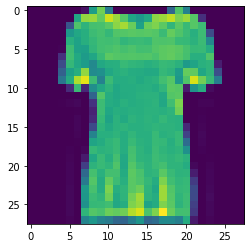

In [18]:
plt.imshow(X_train_full[10])

In [19]:
#checking data of each object
#array of 28 x 28
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

# Data Normasalization

In [22]:
#we normalize data dimension so that they are approximately of the same scale
#dividing by 255 as each pixel range between 0 to 255
X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.0

In [23]:
X_train_n[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Splitting the data into train / validation / test datasets

In [24]:
#training data -- for training the model
#validation data -- for tuning hyper parameter and evaluate the model
#test data -- used to test model after the model gone through initial vetting by the validation set
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [25]:
#generating random seed
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
#creating model object
model = keras.models.Sequential()
#coverting 28 * 28 pixels array to a single 784 pixels array
model.add(keras.layers.Flatten(input_shape = [28, 28]))
#hidden layer 1
model.add(keras.layers.Dense(300, activation = "relu"))
#hidden layer 2
model.add(keras.layers.Dense(100, activation = "relu"))
#output layer
model.add(keras.layers.Dense(10, activation = "softmax"))

In [28]:
#checking model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


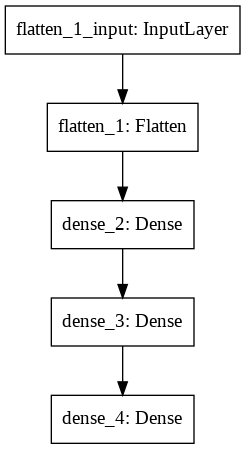

In [29]:
#checking structure of input layer
#importing pydot
import pydot
keras.utils.plot_model(model)

In [30]:
#getting info of weights and biases
weights, biases = model.layers[1].get_weights()

In [31]:
#checking weights
weights

array([[ 0.03591454,  0.01912715, -0.07181118, ..., -0.00221208,
        -0.04306182, -0.03707582],
       [-0.05826424, -0.00181063,  0.04822417, ...,  0.06256016,
        -0.0207617 , -0.03247235],
       [ 0.03462026, -0.0052236 , -0.05412827, ..., -0.03254109,
         0.0208131 ,  0.07420845],
       ...,
       [ 0.04131004,  0.0415991 ,  0.01828562, ...,  0.05515972,
         0.01892434, -0.03389865],
       [-0.02325853,  0.06250843,  0.04589322, ..., -0.06564429,
         0.02855425, -0.05550419],
       [-0.03734419, -0.03430703,  0.02231663, ..., -0.01199641,
         0.03115343,  0.05426274]], dtype=float32)

In [32]:
#checking shape of weights
weights.shape

(784, 300)

In [33]:
#checking biases
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
#checking shape of biases
biases.shape

(300,)

In [36]:
#compling our model
#loss = sparse_categorical as our outut is in form of labels 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [46]:
#fitting our data to model
model_history = model.fit(X_train, y_train , epochs=30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1387 - accuracy: 0.9502 - val_loss: 0.3009 - val_accuracy: 0.8992
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1378 - accuracy: 0.9506 - val_loss: 0.3094 - val_accuracy: 0.8938
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1346 - accuracy: 0.9521 - val_loss: 0.3438 - val_accuracy: 0.8846
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1336 - accuracy: 0.9530 - val_loss: 0.3114 - val_accuracy: 0.8976
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1315 - accuracy: 0.9531 - val_loss: 0.2999 - val_accuracy: 0.9002
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1287 - accuracy: 0.9533 - val_loss: 0.3298 - val_accuracy: 0.8924
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1268 - accuracy: 0.9553 - val_loss: 0.3157 - val_accuracy:

In [47]:
#info of model parameters
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [48]:
#checking model history
model_history.history

{'accuracy': [0.9502363801002502,
  0.9506363868713379,
  0.9520909190177917,
  0.9530181884765625,
  0.9531272649765015,
  0.9532727003097534,
  0.9553090929985046,
  0.9556182026863098,
  0.9563272595405579,
  0.9572908878326416,
  0.9583272933959961,
  0.9584545493125916,
  0.959636390209198,
  0.9602181911468506,
  0.9617636203765869,
  0.9608363509178162,
  0.9629091024398804,
  0.9625454545021057,
  0.9649636149406433,
  0.9642181992530823,
  0.9634000062942505,
  0.9647454619407654,
  0.9661090970039368,
  0.9665636420249939,
  0.9673454761505127,
  0.9679818153381348,
  0.9689090847969055,
  0.9681817889213562,
  0.9694908857345581,
  0.9695454835891724],
 'loss': [0.13869215548038483,
  0.13783621788024902,
  0.13460205495357513,
  0.13358165323734283,
  0.13146093487739563,
  0.12874196469783783,
  0.1267954260110855,
  0.12540066242218018,
  0.12212776392698288,
  0.12169094383716583,
  0.11915171146392822,
  0.11646045744419098,
  0.1150977835059166,
  0.11329807341098785,


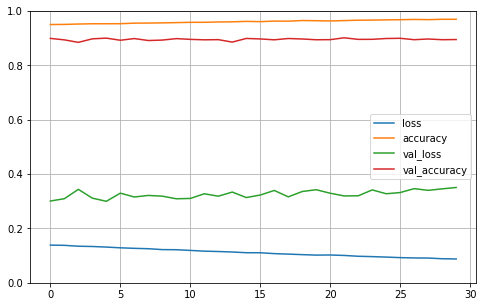

In [50]:
#plotting info to visualise how accuracy changing with each epochs
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True) #for grids in our plot
plt.gca().set_ylim(0, 1) #for y coordinate to be between 0 and 1
plt.show()

In [51]:
#for checking performance of our model using test data set
model.evaluate(X_test, y_test) 
#first output value is loss and second is accuracy 

313/313 [==============================] - 1s 2ms/step - loss: 0.3955 - accuracy: 0.8922


[0.39554205536842346, 0.8921999931335449]

In [52]:
# taking new data for testing 
# taking part of test data set for prediction
X_new = X_test[:3]

In [53]:
#using predict method for prediction 
#checking probability
y_prob = model.predict(X_new)
y_prob.round(2) #rounding probability to 2 digits

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [54]:
#for checking to which class item belong
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [56]:
np.array(class_names)[y_pred] #for using class names 

array(['Ankle Boot', 'PullOver', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


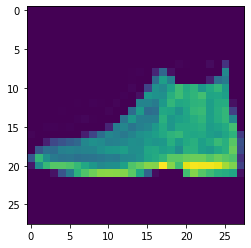

In [59]:
#checking out by printing image of sample 
print(plt.imshow(X_new[0])) #should be a ankle boot


AxesImage(54,36;334.8x217.44)


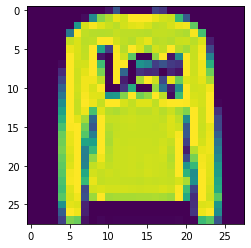

In [60]:
print(plt.imshow(X_new[1])) #should be a pull over

AxesImage(54,36;334.8x217.44)


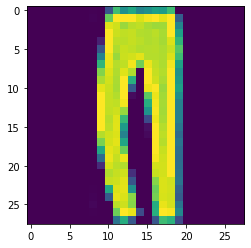

In [61]:
print(plt.imshow(X_new[2])) #should be a trouser

                                                    -------- **END** -------